In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Initial Conditions

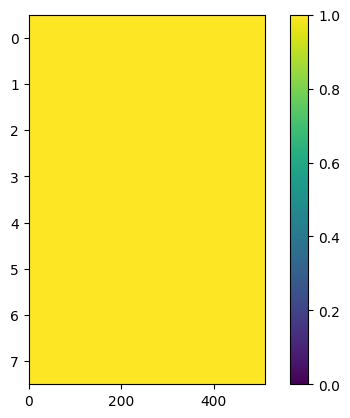

In [58]:
aspt = 100
data = np.loadtxt("./output/rho-0.txt")
plt.imshow(data,vmin=0,vmax=1,aspect=aspt)
plt.colorbar()

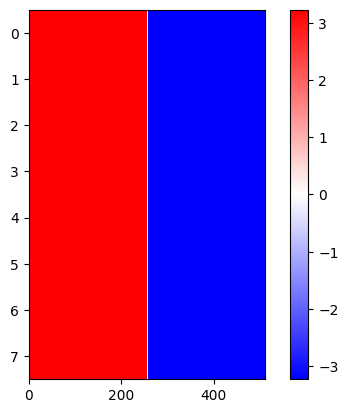

In [59]:
data = np.loadtxt("./output/u-0.txt")
plt.imshow(data,cmap='bwr',aspect=aspt)
plt.colorbar()

# Final Output

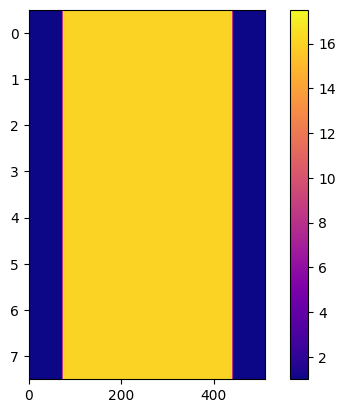

In [60]:
data = np.loadtxt("./output/p.txt")
plt.imshow(data,aspect=aspt,cmap='plasma')
plt.colorbar()

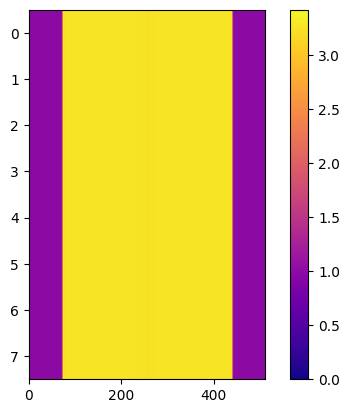

In [61]:
data = np.loadtxt("./output/rho.txt")
plt.imshow(data,vmin=0,aspect=aspt,cmap='plasma')
plt.colorbar()

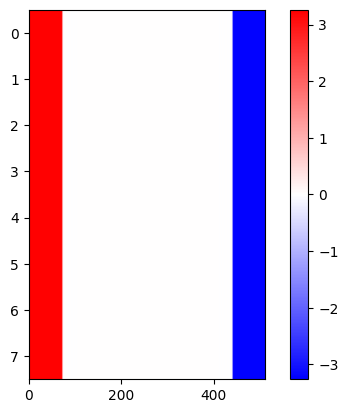

In [62]:
data = np.loadtxt("./output/u.txt")
plt.imshow(data,cmap='bwr',aspect=aspt)
plt.colorbar()

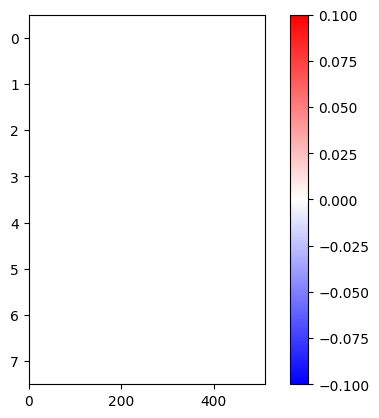

In [63]:
data = np.loadtxt("./output/v.txt")
plt.imshow(data,cmap='bwr',aspect=aspt)
plt.colorbar()

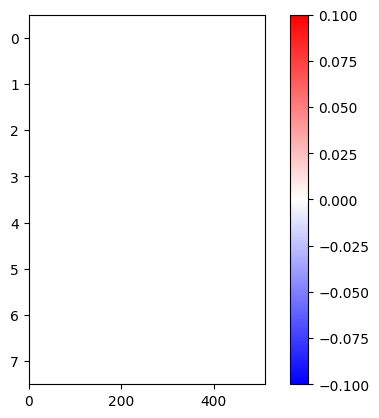

In [64]:
data = np.loadtxt("./output/Bx.txt")
plt.imshow(data,cmap='bwr',aspect=aspt)
plt.colorbar()

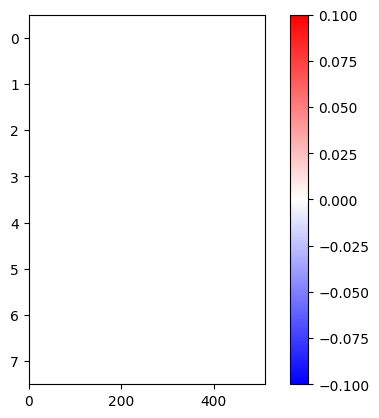

In [65]:
By = np.loadtxt("./output/By.txt")
Bx = np.loadtxt("./output/Bx.txt")

fig, axs = plt.subplots(1,1)
plt.imshow(data,cmap='bwr',aspect=aspt)
plt.colorbar()

m,n = By.shape
x, y = np.arange(0,n,1), np.arange(0,m,1)

axs.streamplot(x,y,Bx,By, density=1, color='tab:green')

# Output at given time

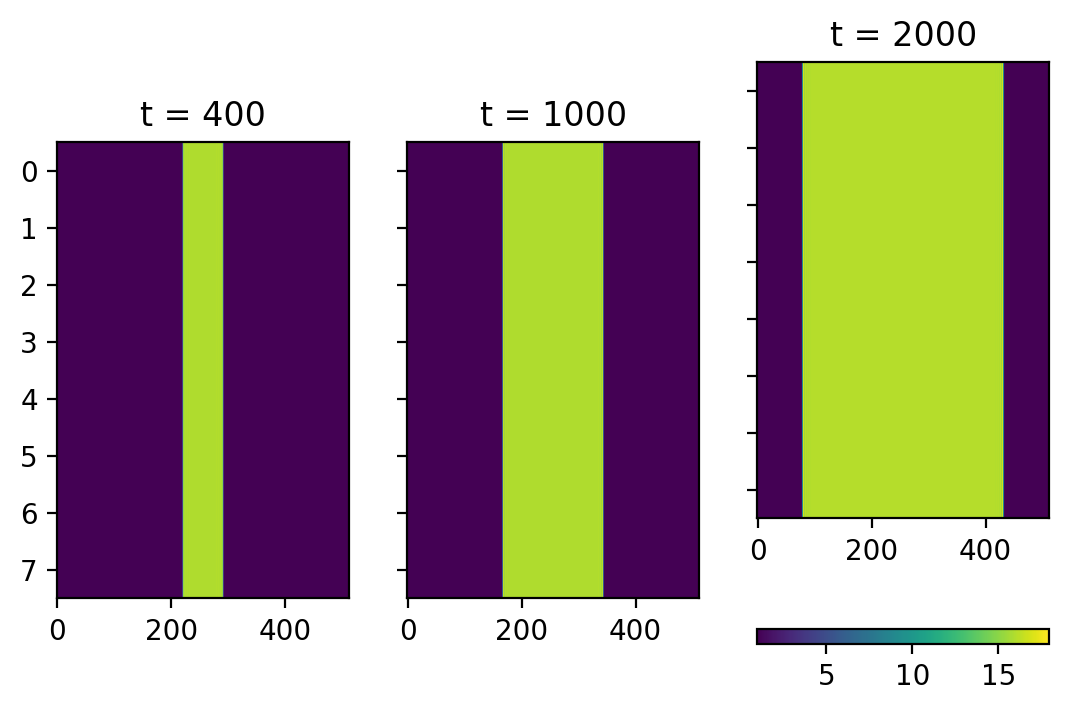

In [67]:
t = [400,1000,2000]
field = 'p'

fig, axs = plt.subplots(1,len(t),sharey=True,dpi=200)
for ii in range(len(t)):
    data = np.loadtxt('./output/' + field + '-' + str(t[ii]) + '.txt')
    im = axs[ii].imshow(data,aspect=aspt)
    axs[ii].set_title('t = ' + str(t[ii]))
plt.colorbar(im,orientation="horizontal")

# Pressure vs Time

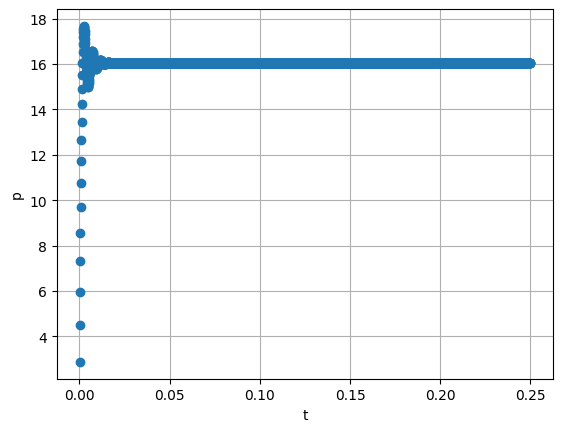

In [68]:
data = np.loadtxt("./output/p_vs_t.txt",delimiter=',')

plt.plot(data[:,0],data[:,1],'o',label='simulation')
plt.xlabel('t')
plt.ylabel('p')
plt.grid()




# Get Shock Velocity

Text(0.5, 1.0, 'u$_s$ = -1.4232342999825571')

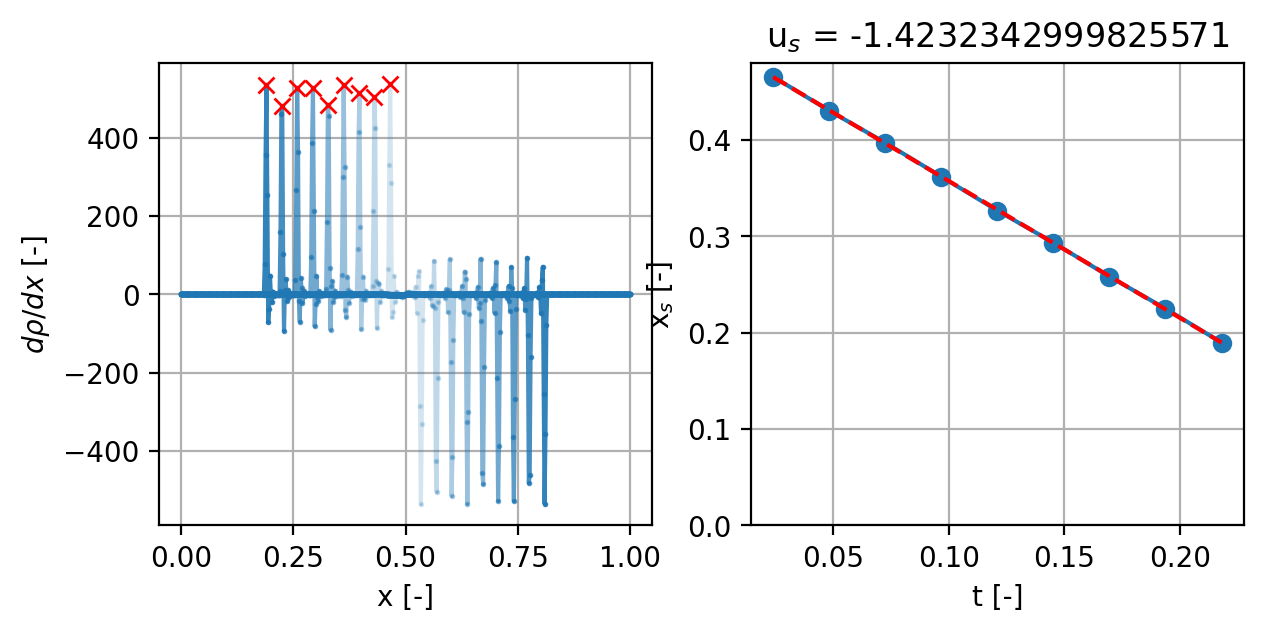

In [72]:
# Get shock front veloicty

step_nums = np.arange(200,2000,200)
fig, axs = plt.subplots(1,2,figsize=(7,3),dpi=200)


t, shock_pos = [], []

for ii,num in enumerate(step_nums):
    rho = np.loadtxt('./output/' + 'rho' + '-' + str(step_nums[ii]) + '.txt')
    t.append(200*1.21e-4*(ii+1))
    
    if ii == 0:
        m,n = rho.shape
        x, y = np.linspace(0,1,n), np.linspace(0,1,m)
        xx, yy = np.meshgrid(x,y)

    X = np.mean(xx,0)
    rho = np.mean(rho,0)
    drhodx = np.gradient(rho,X)

    idx = np.argmax(drhodx)
    shock_pos.append(X[idx])
    
    axs[0].plot(X,drhodx,'o-',markersize=1,alpha=0.1+0.9/2000*num,color='tab:blue')
    axs[0].plot(shock_pos[ii],drhodx[idx],'rx')

axs[0].set_xlabel('x [-]')
axs[0].grid()
axs[0].set_ylabel('$d\\rho/dx$ [-]')

axs[1].plot(t,shock_pos,'o-')
axs[1].set_xlabel('t [-]')
axs[1].set_ylabel('x$_s$ [-]')
axs[1].set_ylim(ymin=0)
axs[1].grid()

from scipy.optimize import curve_fit

def fn(t,v,c):
    return v * t + c # linear function

popt, pcov = curve_fit(fn,t,shock_pos)

u_shock = popt[0]

axs[1].plot(t,fn(np.array(t),popt[0],popt[1]),'r--')

axs[1].set_title('u$_s$ = ' + str(u_shock))

## check with analytical solution

Theoretical Values:
M = 3.602
Density ratio (ρ2/ρ1): 3.2489
Pressure ratio (P2/P1): 15.9719


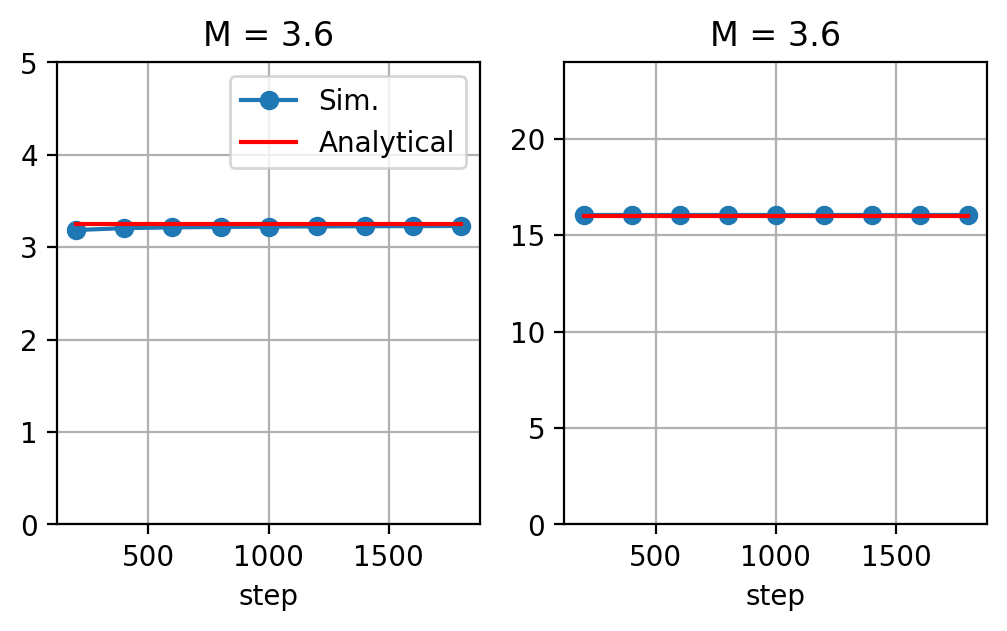

In [73]:

def shock_ratios(M, gamma):
    # Calculate density ratio across the shock
    density_ratio = ((gamma + 1) * M**2) / ((gamma + 1) + (gamma - 1) * (M**2 - 1))
    
    # Calculate pressure ratio across the shock
    pressure_ratio = ((gamma + 1) + 2 * gamma * (M**2 - 1)) / (gamma + 1)
    
    return density_ratio, pressure_ratio

Cs = np.sqrt(5/3 * 1 / 1)
M = (2.5 * Cs - u_shock) / Cs # Mach no. in shock ref frame
gamma = 5/3 # Specific heat ratio for air
density_ratio, pressure_ratio = shock_ratios(M, gamma)

print('Theoretical Values:')
print('M = %1.3f'%M)
print(f"Density ratio (ρ2/ρ1): {density_ratio:.4f}")
print(f"Pressure ratio (P2/P1): {pressure_ratio:.4f}")



sim_den_rat = []
sim_p_rat = []

fig, axs = plt.subplots(1,2,sharex=True,figsize=(6,3),dpi=200)
for ii,num in enumerate(step_nums):
    rho = np.loadtxt('./output/' + 'rho' + '-' + str(step_nums[ii]) + '.txt')
    p = np.loadtxt('./output/' + 'p' + '-' + str(step_nums[ii]) + '.txt')
    rho, p = np.mean(rho,0),  np.mean(p,0)
    
    sim_den_rat.append(rho[rho.shape[0]//2] / rho[0])
    sim_p_rat.append(p[p.shape[0]//2] / p[0])

axs[0].plot(step_nums,sim_den_rat,'-o',label='Sim.')
axs[1].plot(step_nums,sim_p_rat,'-o')

axs[0].set_ylim([0,5])
axs[1].set_ylim([0,pressure_ratio*1.5])

for ii in range(axs.shape[0]):
    axs[ii].grid()
    axs[ii].set_xlabel('step')
    axs[ii].set_title('M = ' + str(np.round(M,2)))
    
# Plot analytical value
axs[0].plot([np.min(step_nums),np.max(step_nums)],[density_ratio]*2,'-r',label='Analytical')
axs[1].plot([np.min(step_nums),np.max(step_nums)],[pressure_ratio]*2,'-r')

axs[0].legend()

